# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Edición 2022**




----

# Encodings

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('talk')
import plotly

In [2]:
melb_df = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [3]:
melb_df.shape

(13580, 21)

In [4]:
melb_df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [5]:
#Cuales son las variables categoricas? 
melb_df.select_dtypes(include=object).columns


Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

## Codificando valores no numéricos

Hasta este momento hemos realizado análisis de datos sobre distintos tipos de variables aleatorias. Sin embargo, muchos métodos utilizados para *Aprendizaje Automático* pueden ser aplicados solamente a matrices numéricas.

Por ello, antes de comenzar con cualquier tipo de modelado, tenemos que **codificar** (encode) toda la información categórica utilizando unicamente información numérica. Al realizar este proceso tenemos que tener en cuenta algunas propiedades que tendrán nuestros datos codificados, y cómo impactarán en los modelos.

### One-hot encodings

La forma más simple de realizar esta codificación de valores categóricos es construir un vector One-Hot encoding. Opera de la siguiente manera:

1. Se identifica el conjunto $C$ de categorías posibles de la variable aleatoria y la cantida de categorías $N = |C|$
2. Se asigna un número entero a cada categoría en el rango $[0; N)$.
3. Para cada valor $r_i$ de nuestro conjunto de datos con categoría $c_j$:

  1. Se construye un vector $x_i$ de 0s de tamaño $N$.
  2. Se asigna el valor 1 al vector $x_i$ en la posición de la categoría $c_j$.

Comenzaremos a trabajar con la librería scikit-learn, que dispone de la mayoría de funciones necesarias para pre-procesar un conjunto de datos y cuenta con tutoriales que explican las distintas opciones. Les recomendamos la sección de [Encoding Categorical Features](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features).

Utilizaremos la clase *OneHotEncoder* para realizar la codificación. Todos los transformadores de scikit-learn siguen una misma interfaz en dos etapas: `fit` y `transform`.
* El método `fit` (entrenar) es el encargado de recopilar toda la información necesaria para aplicar el encoding. En este caso, implementa los pasos 1 y 2 del algoritmo anterior. 
* El método `transform` es el que efectivamente construye los encoding para cada fila del conjunto de datos.

Ver documentacion de [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

### OneHotEncoder. Variante_1

In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder_one_hot = OneHotEncoder(sparse = False)
encoder_one_hot.fit(melb_df[['Type']])
# El método fit (entrenar) es el encargado de recopilar toda la información necesaria para aplicar el encoding.
# En este caso, implementa los pasos 1 y 2 del algoritmo anterior.

# notar que la columna esta pasada como una DataFrame, con doble corchetes

# en este caso vamos a aplicar la transformacion solo a la columna (feature) Type.
# pero podria aplicarse a dos o mas columnas (ver mas adelante en esta misma notebook).

# Hasta ahora NO aplicamos la codificacion, simplemente recopilamos cuales son las categorias que hay que codificar

OneHotEncoder(sparse=False)

In [7]:
# para ver las categorias que fueron codificadas:
encoder_one_hot.categories_

[array(['h', 't', 'u'], dtype=object)]

In [8]:
encoded_types = encoder_one_hot.transform(melb_df[['Type']]) # con esta linea (.transform()) aplicamos la transformacion,
                                                    # en este caso la codificacion.
encoded_types

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

### OneHotEncoder. Variante_2

Si no necesitamos almacenar las categorias en una variable, podemos hacer el entrenamiento y la aplicacion en un solo paso usando la funcion fit_transform()

In [9]:
from sklearn.preprocessing import OneHotEncoder
encoder_One_Hot = OneHotEncoder(sparse=False)
matrix_One_Hot = encoder_One_Hot.fit_transform(melb_df[['Type']]) # usamos la funcion fit_transform()

In [10]:
matrix_One_Hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [11]:
encoder_One_Hot.categories_
# aunque usemos el metodo abreviado igual podemos acceder a las categorias

[array(['h', 't', 'u'], dtype=object)]

---

### DictVectorizer

Si quisieramos seguir trabajando con la matriz codificada deberiamos juntarla con el resto de los datos numericos que tenia el df. Esto implica una serie de pasosadicionales.
\
\
Esta transformación es tan común que Scikit-lean implementa el transformador `DictVectorizer` que codifican automáticamente todos las columnas categóricas y los combinan con los datos numéricos existentes. De esta manera nos ahorramos algunos pasos respecto de la funcion que aplicamos antes (OneHotEncoder().

Para poder utilizarlo, tendremos que convertir el conjunto de datos en una lista de diccionarios.


In [12]:
'''
feature_cols = ['Suburb',
                'Type',
                'Method',
                'SellerG',
                'Date',
                'CouncilArea',
                'Regionname']
'''
feature_cols = ['Suburb', 'Type', 'Distance', 'Bedroom2', 'Bathroom',
            'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Regionname']

feature_dict = list(melb_df[feature_cols].T.to_dict().values())
feature_dict[1]

{'Suburb': 'Abbotsford',
 'Type': 'h',
 'Distance': 2.5,
 'Bedroom2': 2.0,
 'Bathroom': 1.0,
 'Car': 0.0,
 'Landsize': 156.0,
 'BuildingArea': 79.0,
 'YearBuilt': 1900.0,
 'Regionname': 'Northern Metropolitan'}

In [13]:
feature_dict[:2]

[{'Suburb': 'Abbotsford',
  'Type': 'h',
  'Distance': 2.5,
  'Bedroom2': 2.0,
  'Bathroom': 1.0,
  'Car': 1.0,
  'Landsize': 202.0,
  'BuildingArea': nan,
  'YearBuilt': nan,
  'Regionname': 'Northern Metropolitan'},
 {'Suburb': 'Abbotsford',
  'Type': 'h',
  'Distance': 2.5,
  'Bedroom2': 2.0,
  'Bathroom': 1.0,
  'Car': 0.0,
  'Landsize': 156.0,
  'BuildingArea': 79.0,
  'YearBuilt': 1900.0,
  'Regionname': 'Northern Metropolitan'}]

Notar que el resultado que obtuvimos es una LISTA  de DICCIONARIOS en donde:
* Cada elemento de la **LISTA** es un **DICCIONARIO**
* Cada **DICCIONARIO** es una **OBSERVACION** del DF original
* Cada **VALUE** del diccionario tiene el nombre de una **COLUMNA**
* Cada **KEY** del diccionario tiene el valor de la celda original 

In [14]:
from sklearn.feature_extraction import DictVectorizer
encoder_dv = DictVectorizer(sparse=True) #el parametro sparse lo dejamos en True (su valor por defecto)
feature_matrix = encoder_dv.fit_transform(feature_dict)

In [15]:
feature_matrix 
# esta es una matriz esparsa (no densa) que tiene las variables categoricas codificadas.

<13580x332 sparse matrix of type '<class 'numpy.float64'>'
	with 135800 stored elements in Compressed Sparse Row format>

In [16]:
encoder_dv.get_feature_names()[:50]
# notar que la funcion get_feature_names() se aplica sobre el encoder y no sobre la matriz

['Bathroom',
 'Bedroom2',
 'BuildingArea',
 'Car',
 'Distance',
 'Landsize',
 'Regionname=Eastern Metropolitan',
 'Regionname=Eastern Victoria',
 'Regionname=Northern Metropolitan',
 'Regionname=Northern Victoria',
 'Regionname=South-Eastern Metropolitan',
 'Regionname=Southern Metropolitan',
 'Regionname=Western Metropolitan',
 'Regionname=Western Victoria',
 'Suburb=Abbotsford',
 'Suburb=Aberfeldie',
 'Suburb=Airport West',
 'Suburb=Albanvale',
 'Suburb=Albert Park',
 'Suburb=Albion',
 'Suburb=Alphington',
 'Suburb=Altona',
 'Suburb=Altona Meadows',
 'Suburb=Altona North',
 'Suburb=Ardeer',
 'Suburb=Armadale',
 'Suburb=Ascot Vale',
 'Suburb=Ashburton',
 'Suburb=Ashwood',
 'Suburb=Aspendale',
 'Suburb=Aspendale Gardens',
 'Suburb=Attwood',
 'Suburb=Avondale Heights',
 'Suburb=Bacchus Marsh',
 'Suburb=Balaclava',
 'Suburb=Balwyn',
 'Suburb=Balwyn North',
 'Suburb=Bayswater',
 'Suburb=Bayswater North',
 'Suburb=Beaconsfield',
 'Suburb=Beaconsfield Upper',
 'Suburb=Beaumaris',
 'Suburb=B

## Matrices esparsas

Las codificaciones one-hot tienen la propiedad de aumentar la cantidad de memoria requerida para almacenar una variable de manera **cuadrática** con respecto al número de categorías. Sin embargo, la mayoría de los elementos de la nueva representación serán nulos. La cantidad de elementos no-nulos de la matriz crece **linealmente** con respecto al número de categorías a representar.

Por ello existen las *matrices esparsas*, que almacenan unicamente los valores no-nulos de una matriz en distintas estructuras de datos.

Los métodos de codificación como `DictVectorizer` o `OneHotEncoding` suelen devolver como resultado matrices esparsas si es más eficiente en términos de recursos computacionales.

In [17]:
feature_matrix
# notar que como resultado de aplica la funcion DictVectorizer obtuvimos una matriz esparsa 
# que condensa la informacion de una matriz densa de 13580 observaciones y 690 columnas

<13580x332 sparse matrix of type '<class 'numpy.float64'>'
	with 135800 stored elements in Compressed Sparse Row format>

![picture](https://matteding.github.io/images/coo.gif)

Existen [distintos tipos de matrices esparsas](https://docs.scipy.org/doc/scipy/reference/sparse.html) y las operaciones sobre cada una de ellas son distintas; y distintas a las matrices densas.

In [18]:
# Fill nan values on sparse matrix.
if np.any(np.isnan(feature_matrix.data)):
    feature_matrix.data = np.nan_to_num(feature_matrix.data)

Para aplicar algunas transformaciones o modelos es necesario convertir las matrices esparsas a densas. Antes de realizar este cambio, es recomendable calcular el tamaño de la matriz final. Recordar que cada número de punto flotante ocupa 4 bytes para la precisión simple (numpy.float32) y 8 bytes para la precisión doble (numpy.float64).

In [19]:
feature_matrix.shape[0] * feature_matrix.shape[1] * 4 / 1024


17611.5625

In [20]:
# Before doing this type of conversion, it's mandatory to calculate the
# size of the resulting matrix!
matrix_size = feature_matrix.shape[0] * feature_matrix.shape[1] * 4 # en bytes
matrix_size_kb = matrix_size / 1024
matrix_size_mb = matrix_size_kb / 1024
print(f"The dense matrix will weight approximately {matrix_size_mb:.2f} MB")

#-------------------------------------------------------------------------------------

limit_size_mb = 10 # no queremos que la matriz ocupe mas de 10 Mb
precision_type = np.float32
if matrix_size_mb < limit_size_mb:  # Matrix is less than 10MB
    dense_feature_matrix = feature_matrix.astype(precision_type).todense()
    print('Sparse matrix was converted to Dense matrix')
else:
    # We calculate how many rows would fit given the number of columns
    n_rows = int(limit_size_mb *1024 * 1024 / 4 / feature_matrix.shape[1])
    
    print(f"Matrix too big! Using only first {n_rows} of {feature_matrix.shape[0]} rows")
    dense_feature_matrix = feature_matrix[:n_rows].astype(precision_type).todense() # con esta linea convertimos UNA parte
                                                                                    # a una matriz densa

# -----------------------------------------------------------------------------------
print("Final size: {:.2f}".format(dense_feature_matrix.nbytes / 1024 / 1024))

The dense matrix will weight approximately 17.20 MB
Matrix too big! Using only first 7895 of 13580 rows
Final size: 10.00


In [21]:
# Remember to cut your original data as well.
if dense_feature_matrix.shape[0] < len(melb_df):
    melb_df_sample = melb_df.iloc[:dense_feature_matrix.shape[0]]
else:
    melb_df_sample = melb_df

HASTA AHORA...\
\
**dense_feature_matrix** es una matriz con los datos categoricos codificados pero que tuvo que ser recortada porque el tamano era demasiado grande

**melb_df_sample** es la df original que fue cortada en la misma fila que la matriz dense_feature_matrix

## Reducción de dimensionalidad con PCA

En las siguientes filas, aplicaremos [PCA](https://scikit-learn.org/stable/modules/decomposition.html#pca) para reducir la dimensionalidad del conjunto de datos a 2 dimensiones.

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1)) #notar que en la notebook 05 PCA Iris dataset habiamos usado StandardScaler
scaled_dense_feature_matrix = scaler.fit_transform(dense_feature_matrix)
np.min(scaled_dense_feature_matrix), np.max(scaled_dense_feature_matrix)

(-1.0, 1.0)

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
pca.fit(scaled_dense_feature_matrix)
proyected_features = pca.transform(scaled_dense_feature_matrix)
proyected_features.shape, proyected_features[:2] 

((7895, 15),
 array([[-1.389683  ,  0.99675363, -1.1036108 ,  1.109607  , -0.22952704,
         -0.36260924,  0.56025743, -0.01363332,  0.02505708, -0.12547147,
         -0.113809  , -0.0198013 , -0.00842537,  0.04081838,  0.14470097],
        [-1.1829128 ,  1.1808188 , -0.94768786, -0.74071324, -0.3432142 ,
         -0.37152442,  0.54984623, -0.02651904,  0.05110897, -0.14750643,
         -0.12665328, -0.01567975,  0.00393162,  0.05933094,  0.12769905]],
       dtype=float32))

In [24]:
pca.explained_variance_ratio_

array([0.17174335, 0.13777173, 0.10051891, 0.08688542, 0.04767594,
       0.04187408, 0.02466754, 0.01059206, 0.00950293, 0.00887787,
       0.00808983, 0.00782328, 0.0077054 , 0.00715356, 0.00691018],
      dtype=float32)

In [25]:
# a la DF melb_df vamos a agregarle 2 columnas que van a tener los valores de las dos dimensiones de mayor variabilidad
# PC1 y PC2
 
melb_df_sample[['PC1', 'PC2']] = proyected_features[:,:2]
melb_df_sample

c:\users\nico.-\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
<ipython-input-25-30fc4eb5c79f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb_df_sample[['PC1', 'PC2']] = proyected_features[:,:2]
c:\users\nico.-\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,PC1,PC2
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,-1.389683,0.996754
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,-1.182913,1.180819
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,-1.189168,1.167866
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,-1.395891,0.983875
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,-1.190541,1.164553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7890,Glen Iris,28 Martin Rd,3,h,1601000.0,S,Marshall,20/05/2017,9.2,3146.0,...,453.0,102.0,1930.0,Boroondara,-37.8487,145.0592,Southern Metropolitan,10412.0,0.195195,-1.444169
7891,Glen Iris,1/18 Peace St,2,t,797000.0,S,Jellis,20/05/2017,9.2,3146.0,...,97.0,NaN,1970.0,Boroondara,-37.8637,145.0632,Southern Metropolitan,10412.0,1.534317,-0.627625
7892,Glen Iris,2/8 Lithgow St,2,u,910000.0,S,Fletchers,29/04/2017,9.2,3146.0,...,157.0,97.0,1970.0,Boroondara,-37.8499,145.0814,Southern Metropolitan,10412.0,2.469954,-0.077094
7893,Glen Iris,2/23 Peace St,3,t,1315000.0,S,Harcourts,29/04/2017,9.2,3146.0,...,184.0,NaN,NaN,Boroondara,-37.8644,145.0630,Southern Metropolitan,10412.0,1.322255,-0.819220


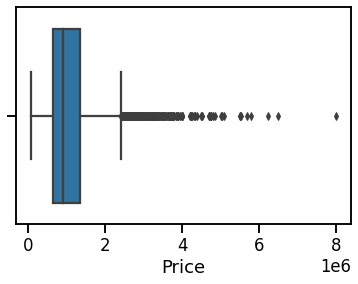

In [26]:
sns.boxplot(data = melb_df_sample,
            x = 'Price')
plt.show()

# en la figura de a continuacion solo nos vamos a quedar con las propiedades que valen menos de 2000000

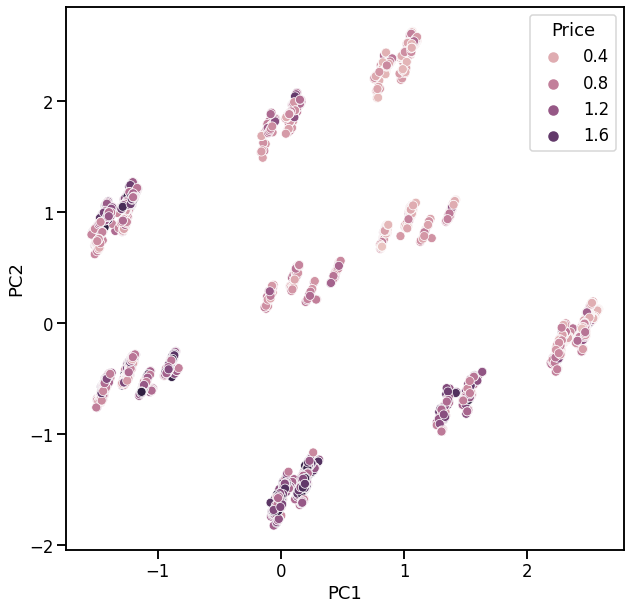

In [44]:
data = melb_df_sample[melb_df_sample.Price < 2000000]
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(data=data,
                x='PC1',
                y='PC2',
                hue = 'Price')  # 'Landsize' 'Price' 'YearBuilt'
plt.show()

Tenemos que volver a escalar todos los datos a un mismo rango. ¿Utilizamos estandarización o escalado linear?

In [28]:
# TODO Here we have to pre-process the matrix before applying PCA
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
stdandard_dense_feature_matrix = std_scaler.fit_transform(dense_feature_matrix)
np.min(stdandard_dense_feature_matrix), np.max(stdandard_dense_feature_matrix)

(-2.892464, 88.84818)

In [29]:
from sklearn.decomposition import PCA
pca_std = PCA(n_components=15)
pca_std.fit(stdandard_dense_feature_matrix)
proyected_features_std = pca.transform(stdandard_dense_feature_matrix)
proyected_features_std.shape

(7895, 15)

In [30]:
pca_std.explained_variance_ratio_

array([0.02208828, 0.0172488 , 0.01447883, 0.01342774, 0.01286543,
       0.01061691, 0.00997364, 0.00798667, 0.00720353, 0.00655346,
       0.00647911, 0.00645632, 0.00644206, 0.00643911, 0.00643006],
      dtype=float32)

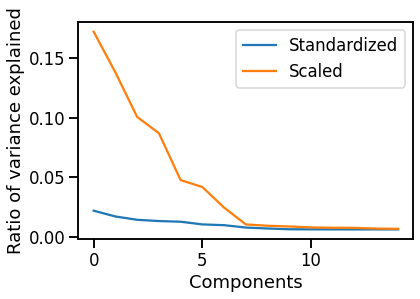

In [31]:
sns.lineplot(x=range(pca_std.n_components),
                 y=pca_std.explained_variance_ratio_, label='Standardized')
sns.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_, label='Scaled')
plt.ylabel("Ratio of variance explained")
plt.xlabel("Components")
plt.legend()

In [32]:
melb_df_sample[['pca1_standard', 'pca2_standard']] = proyected_features_std[:,:2]

c:\users\nico.-\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
<ipython-input-32-7e766ea33ee9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb_df_sample[['pca1_standard', 'pca2_standard']] = proyected_features_std[:,:2]
c:\users\nico.-\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

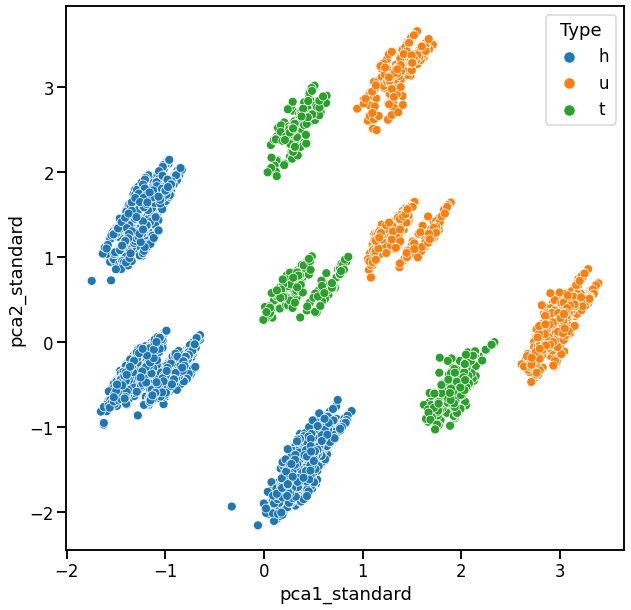

In [37]:
data = melb_df_sample
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(data=data, x='pca1_standard', y='pca2_standard',
                    hue='Type')  # 'Landsize' 'Price' 'YearBuilt'


plt.show()